### if there are only 6 unique continents, but there are 1000000 rows, even this takes same space we can store continents in a list, can pass index, so that it occupes less space this is available readymade in pandas, called CATEGORY. but if we are going to store country as category, it is going to store same no of strings and small integers. so size increases substantially bur speeds up computations

In [95]:
import pandas as pd

In [96]:
col_names=['sl_no','age','gender','role','id']
data=pd.read_table("../files/ex.txt",sep="|",names=col_names)#not sure ahy header=0 is used


In [97]:
data.head()
# data.role.cat.codes - if this line ran before converting to ctaegories, will errr

sl_no   age gender        role     id
0      1  24.0      M  technician  85711
1      2   NaN      F       other  94043
2      3   NaN      M      writer  32067
3      4  24.0      M  technician  43537
4      5  33.0      F       other  15213

In [98]:
# age has 2 nan, which is excluded from not null
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl_no   943 non-null    int64  
 1   age     941 non-null    float64
 2   gender  943 non-null    object 
 3   role    943 non-null    object 
 4   id      943 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 37.0+ KB


### at the end shows in + in memory. object type stores string, and not counted

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl_no   943 non-null    int64  
 1   age     941 non-null    float64
 2   gender  943 non-null    object 
 3   role    943 non-null    object 
 4   id      943 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 37.0+ KB


#### now original size is displayed

In [100]:
data.memory_usage(deep=True)

Index       128
sl_no      7544
age        7544
gender    62238
role      61400
id        58466
dtype: int64

In [101]:
data.memory_usage(deep=True).sum()

197320

In [102]:
data.dtypes

sl_no       int64
age       float64
gender     object
role       object
id         object
dtype: object

#### size of roles is reduxed from 61400 to 2952

In [103]:
#converting role to category saves memory
data['role']=data.role.astype('category')
data.dtypes

sl_no        int64
age        float64
gender      object
role      category
id          object
dtype: object

In [104]:
data.memory_usage(deep=True)

Index       128
sl_no      7544
age        7544
gender    62238
role       2952
id        58466
dtype: int64

#### if we wanna c the index

In [105]:
data.role.cat.codes

0      19
1      13
2      20
3      19
4      13
       ..
938    18
939     0
940    18
941    10
942    18
Length: 943, dtype: int8

In [106]:
data.role.cat.categories

Index(['administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       'salesman', 'scientist', 'student', 'technician', 'writer'],
      dtype='object')

In [107]:
data.role.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: role, dtype: int64

In [108]:
data.role.value_counts().count()

21

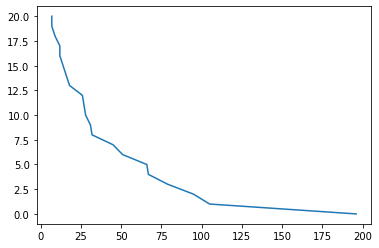

In [113]:
import matplotlib.pyplot as plt
plt.plot(data.role.value_counts(), range(0,21))